# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?


*   The problem at hand is that we are trying to figure out exactly what variables*(mileage, year, locations, etc)* deem as significant in giving us a better understanding at predicting which variables will allow us to have a competitive pricing model, due to the accuracy of our pricing model. The is an important business problem to solve because the more accurate our pricing model is the more informed we are of the market we are in, which will allow us to give better customer service, allowing competitive pricing and ensuring buyers pay fair market value.



### **The objective:**

 - What is the intended goal?


*   The intended goal is to create a machine learning model using a range of different regression techniques*(Linear Regression, Decision Tree , and Random Forests)* to compare and contrast the accuracy and effectivness of which model is most reliable in giving us the highest accuracy of predicting the price of each car in the structured data given.
Model performance will be assessed using **R²**, **RMSE**, and **MAE** to
determine which model provides the most reliable predictions.


### **The key questions:**

-What are the key questions that need to be answered?


*   What are the key independent variables that affect our car prices?

*   What variables have little to no significance in helping predict the value of a car in our dataset accurately?

*   Which regression model performs best for price prediction?




### **The problem formulation**:

- What is it that we are trying to solve using data science?


*   With the use of data science, it allows us to use the structured data given to create a prediction model that helps us accurately predict the price of a car. By applying regression models to structured historical data, we can identify key factors influencing price and minimize the gap between predicted and actual values. This approach ensures pricing consistency that is congruent with the market, which will allow us to make strageic business decisions.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [123]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#importing libraries for statistics
from scipy import stats

#importing library to split the data
from sklearn.model_selection import train_test_split

# importing library for scaling the data
from sklearn.preprocessing import StandardScaler

#importing libraries for model building
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

### **Let us load the data**

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
# loading dataset
used_cars_df = pd.read_csv('drive/MyDrive/MIT Capstone Projects/used_cars.csv')


## Data Overview

- Observations
- Sanity checks

In [181]:
#first few rows
print(used_cars_df.head())

   S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  New_price  Price  
0   58.16    5.0        NaN   1.75  
1  126.20    5.0        NaN  12.50  
2   88.70    5.0       8.61   4.50  
3   88.76    7.0

In [182]:
print(used_cars_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB
None


**Observations**


*   There are **7253 entries** and **14 columns**
*   Numerical Variables: **9** ; Categorical Variables: **5**


*   There are **7,757** **missing values** under the **Mileage**, **Engine**, **Power**, **Seats**, **New_Price**, and **Price** variables, collectively







In [183]:
#checking for missing values in the dataset
print(used_cars_df.isnull().sum())

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64


**Observations**


*   Number of **missing values** per variable:


  *   Mileage: 2
  *   Engine: 46

  *   Power: 175

  *   Seats: 53
  *   New_Price: 6247

  *   Price: 1234

In [184]:
#checking for duplicated values in the dataset
print(used_cars_df.duplicated().sum())

0


Observations:


*   There are 0 duplicated values




## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [185]:
# checking the statistical summary of the data
print(used_cars_df.describe(include = "all").T)

                    count unique                     top  freq          mean  \
S.No.              7253.0    NaN                     NaN   NaN        3626.0   
Name                 7253   2041  Mahindra XUV500 W8 2WD    55           NaN   
Location             7253     11                  Mumbai   949           NaN   
Year               7253.0    NaN                     NaN   NaN   2013.365366   
Kilometers_Driven  7253.0    NaN                     NaN   NaN  58699.063146   
Fuel_Type            7253      5                  Diesel  3852           NaN   
Transmission         7253      2                  Manual  5204           NaN   
Owner_Type           7253      4                   First  5952           NaN   
Mileage            7251.0    NaN                     NaN   NaN      18.14158   
Engine             7207.0    NaN                     NaN   NaN    1616.57347   
Power              7078.0    NaN                     NaN   NaN    112.765214   
Seats              7200.0    NaN        

**Observations**


*   We can see there is **2041** unique values under the column (independent variable), **"Name"**. Moreover, the car name, **"Mahindra XUV500 W8 2WD**", is labeled the most in our dataset showing up **55 times** throughout our data set.
*   Under the **location** variable, there are **11 unique locations** where cars are either being sold or avalable in. Furthermore, the location, **"Mumbai"**, is seen the most reoccuring **949 times** in our dataset.


*   There are **5** fuel types

      *   **Diesel** fuel type shows up most frequently, reoccuring **3852 times** in our dataset


*   There are **2** transmissions in the dataset
      *   **Manual** transmission type shows up most frequently, reocurring **5204 times** in our dataset



*   There are **4 unique values** under the **Owner_Type** column
      *   The unique variable, "First", shows up most frequently, reoccuring 5952 times

      *   It indicates that there are more **"1st"** time owners of a specific car than there are "**2nd**", "**3rd**", or **"4th & above"** owners of a used car in our dataset


*   The **75th** percentile of seats is **5**. It indicates that the vasts **majority** of cars in our data set have **5 or more** seats.




In [186]:
# checking categorical variable info
cat_col = list(used_cars_df.select_dtypes(include = "object").columns)

for column in cat_col:
  print(used_cars_df[column].value_counts())
  print ("-" * 50)

Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: count, Length: 2041, dtype: int64
--------------------------------------------------
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64
--------------------------------------------------
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64
--------------------------

**Observations**



**Categorical** Variable Insights
*   **82%** of used cars in our dataset has an **owner type of 1** previous owner in the past**(5952)**

*   **99%** of used cars in our dataset are cars that use either petroleum gas or diesel
*   **71%** of used cars in our dataset are automatic transmission

*   The **top 4 places** cars are sold or available for purchase are in **Mumbai**, **Hyderabad**, **Coimbatore**, and **Kochi**


## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

In [187]:
def univariate_numerical_analysis(df, column):
    fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={"height_ratios" : (1,3)}, figsize = (12,7))
    sns.boxplot(x=df[column], showmeans=True, ax=ax[0])
    sns.histplot(x=df[column], kde = True, ax=ax[1])
    ax[1].axvline(x=df[column].mean(), color='green', linestyle='--')
    ax[1].axvline(x=df[column].median(), color='red', linestyle='--')
    fig.suptitle(f'Univariate Analysis of {column}')

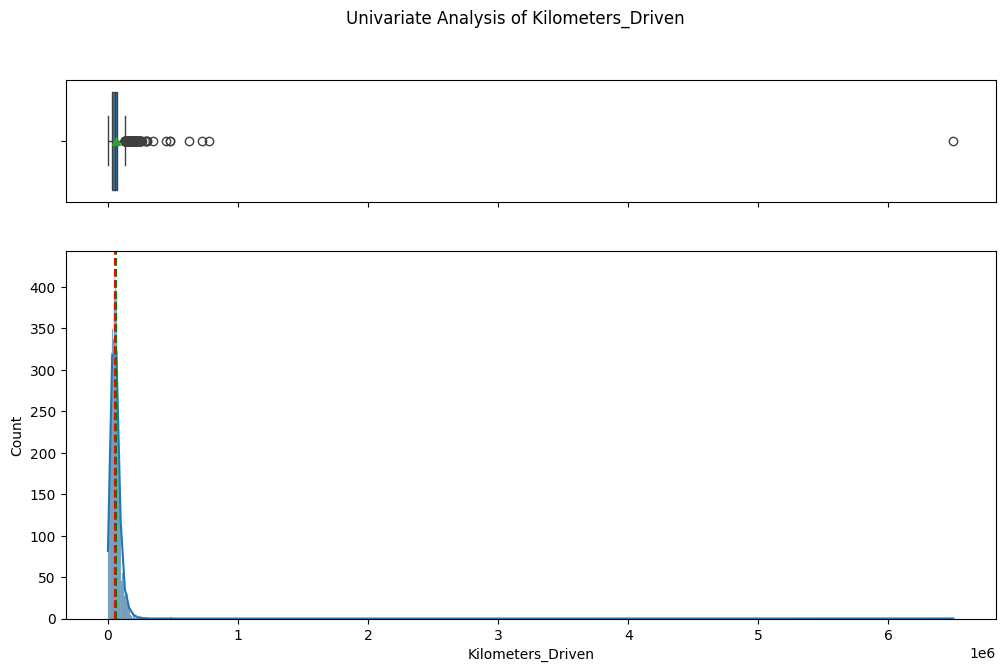

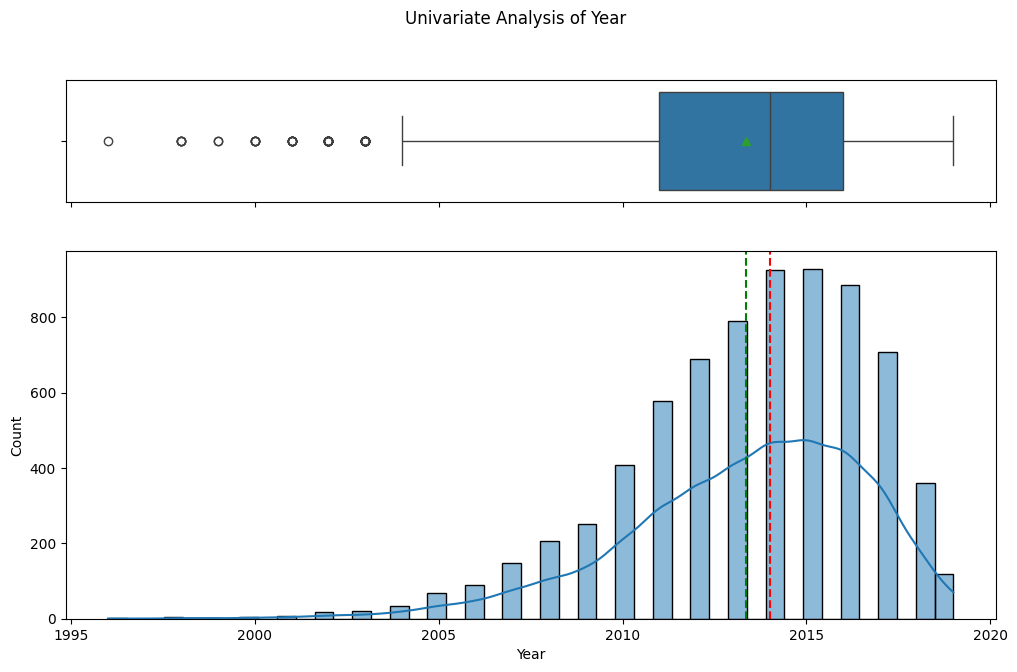

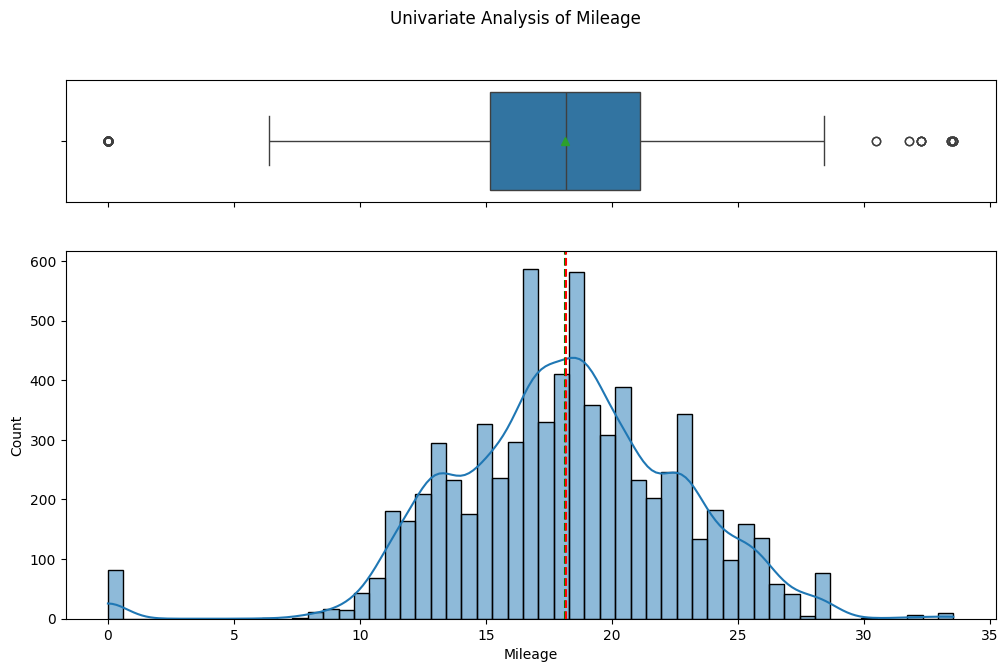

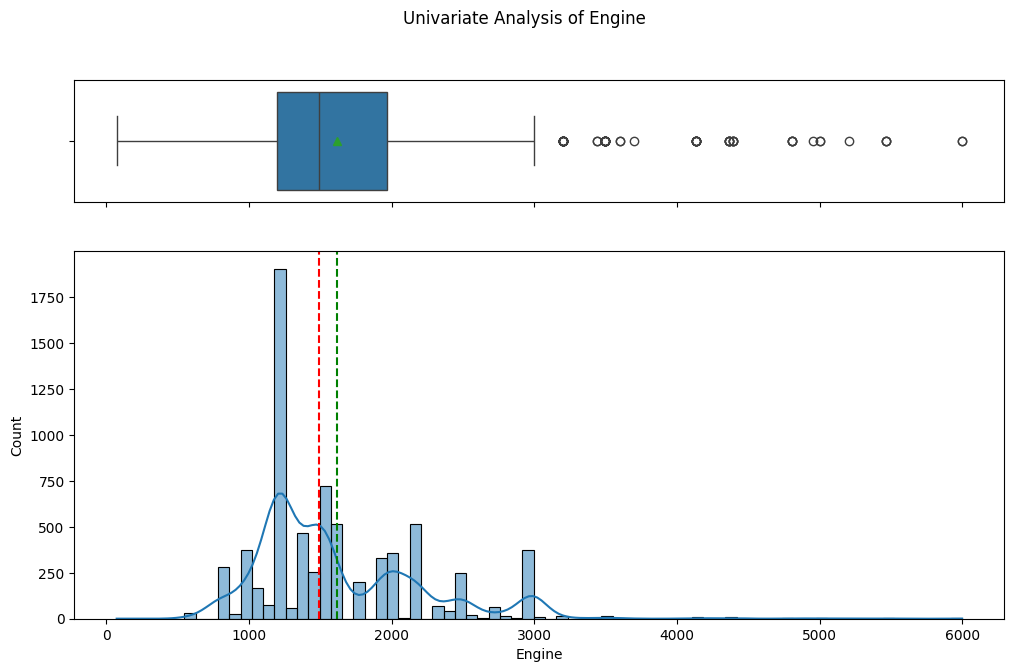

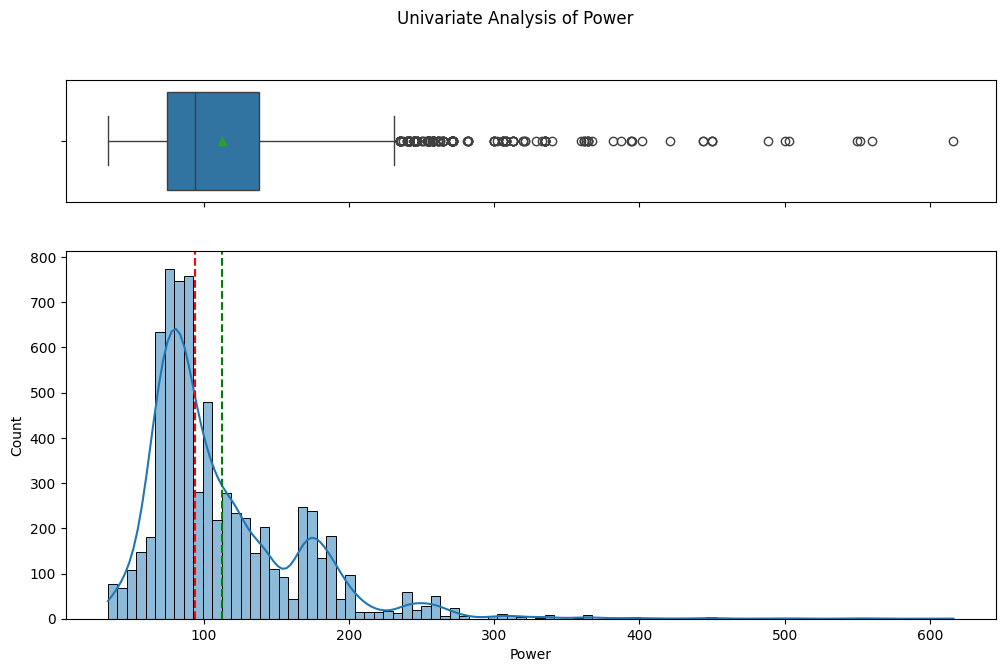

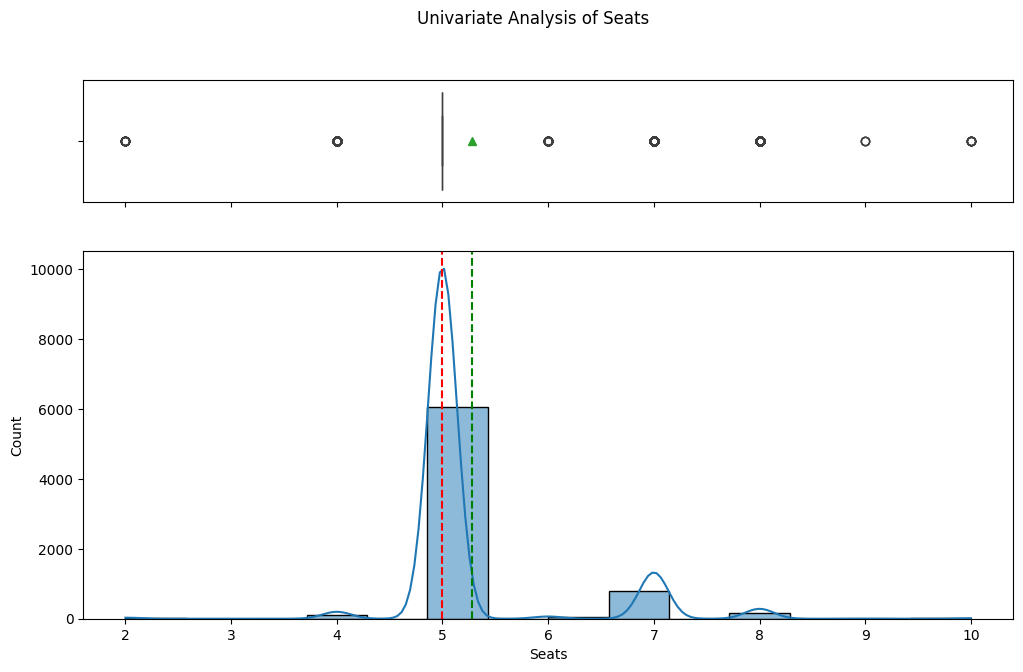

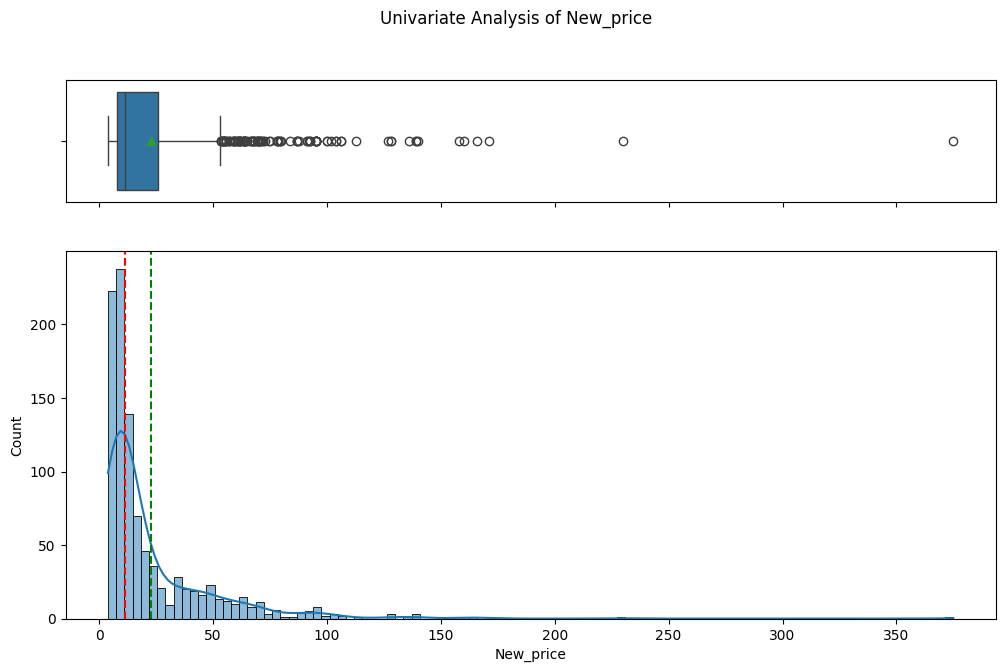

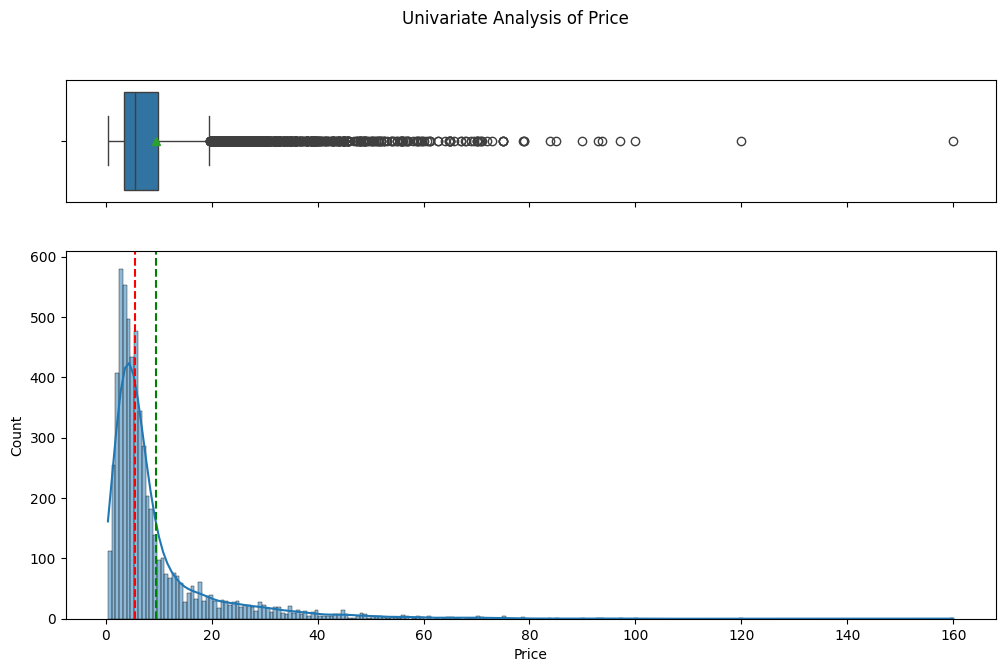

In [188]:
univariate_numerical_analysis(used_cars_df, 'Kilometers_Driven')
univariate_numerical_analysis(used_cars_df, 'Year')
univariate_numerical_analysis(used_cars_df, 'Mileage')
univariate_numerical_analysis(used_cars_df, 'Engine')
univariate_numerical_analysis(used_cars_df, 'Power')
univariate_numerical_analysis(used_cars_df, 'Seats')
univariate_numerical_analysis(used_cars_df, 'New_price')
univariate_numerical_analysis(used_cars_df, 'Price')

**Observations**

Univariate analysis of **Numerical Variables**:


*  ** Year**: Left skewed; median year of car approx. 2014

*   **Mileage**: Seems to have a uniformed distribution; median lying around 17

*   **Engine**: Seems to have a multi-modal distribution; median approx. 1500

*   **Power**: Seems to have a multi-modal distribution; median approx. 90

*  **New_Price:** Right skewed; median approx. around 4-5.
*   **Price**: Right Skewed; median approx. around 4-5

In [189]:
log_price = pd.DataFrame(used_cars_df[["Price", "New_price"]].copy()) # Create a new DataFrame with the selected columns
log_price['price_log'] = np.log(used_cars_df['Price'] + 1) # Create the price_log column by log transforming the 'Price' column
log_price['New_price_log'] = np.log(used_cars_df['New_price'] + 1) # Create the New_price_log column by log transforming the 'New_price' column
log_price['Kilometers_Driven_log'] = np.log(used_cars_df['Kilometers_Driven'] + 1) # Create the Kilometers_Driven_log column by log transforming the 'Kilometers_Driven
print(log_price)

      Price  New_price  price_log  New_price_log  Kilometers_Driven_log
0      1.75        NaN   1.011601            NaN              11.184435
1     12.50        NaN   2.602690            NaN              10.621352
2      4.50       8.61   1.704748       2.262804              10.736418
3      6.00        NaN   1.945910            NaN              11.373675
4     17.74        NaN   2.930660            NaN              10.613271
...     ...        ...        ...            ...                    ...
7248    NaN        NaN        NaN            NaN              11.401010
7249    NaN        NaN        NaN            NaN              10.985310
7250    NaN        NaN        NaN            NaN              10.239996
7251    NaN        NaN        NaN            NaN              10.864044
7252    NaN        NaN        NaN            NaN              11.190569

[7253 rows x 5 columns]


<Axes: xlabel='price_log', ylabel='Count'>

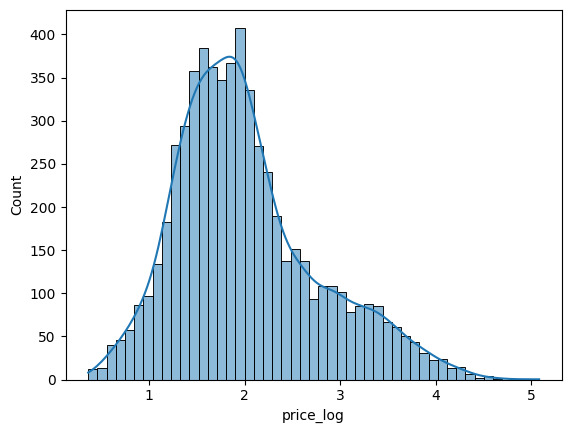

In [190]:
# log transformation on target variable 'Price'
sns.histplot(x=log_price['price_log'], kde = True)

<Axes: xlabel='New_price_log', ylabel='Count'>

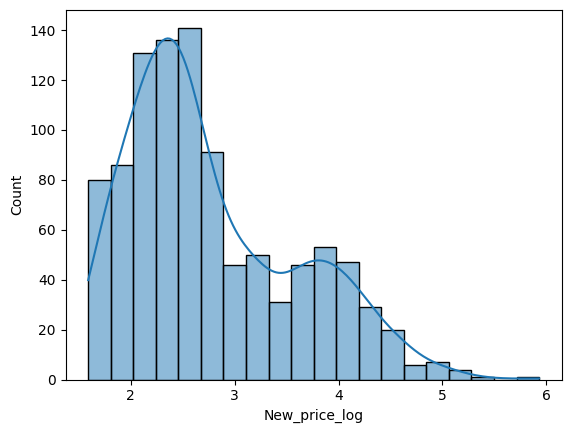

In [191]:
sns.histplot(x=log_price['New_price_log'], kde = True)

<Axes: xlabel='Kilometers_Driven_log', ylabel='Count'>

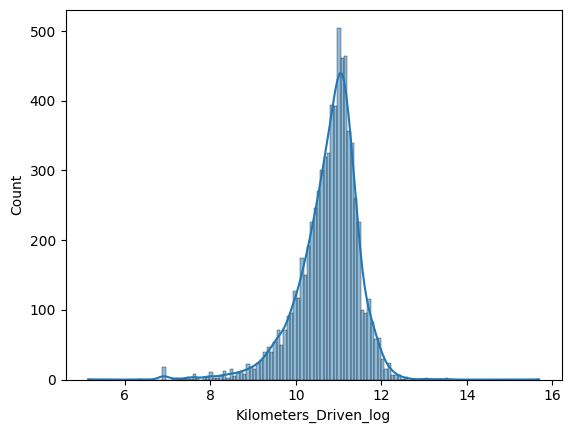

In [192]:
sns.histplot(x=log_price['Kilometers_Driven_log'], kde = True)

**Observations**


*   To **adjust** the **skewedness** to a more **normal distribution** we took the **log** of **'Kilometers_Driven'**, **'Price'**, and **'New_price'**



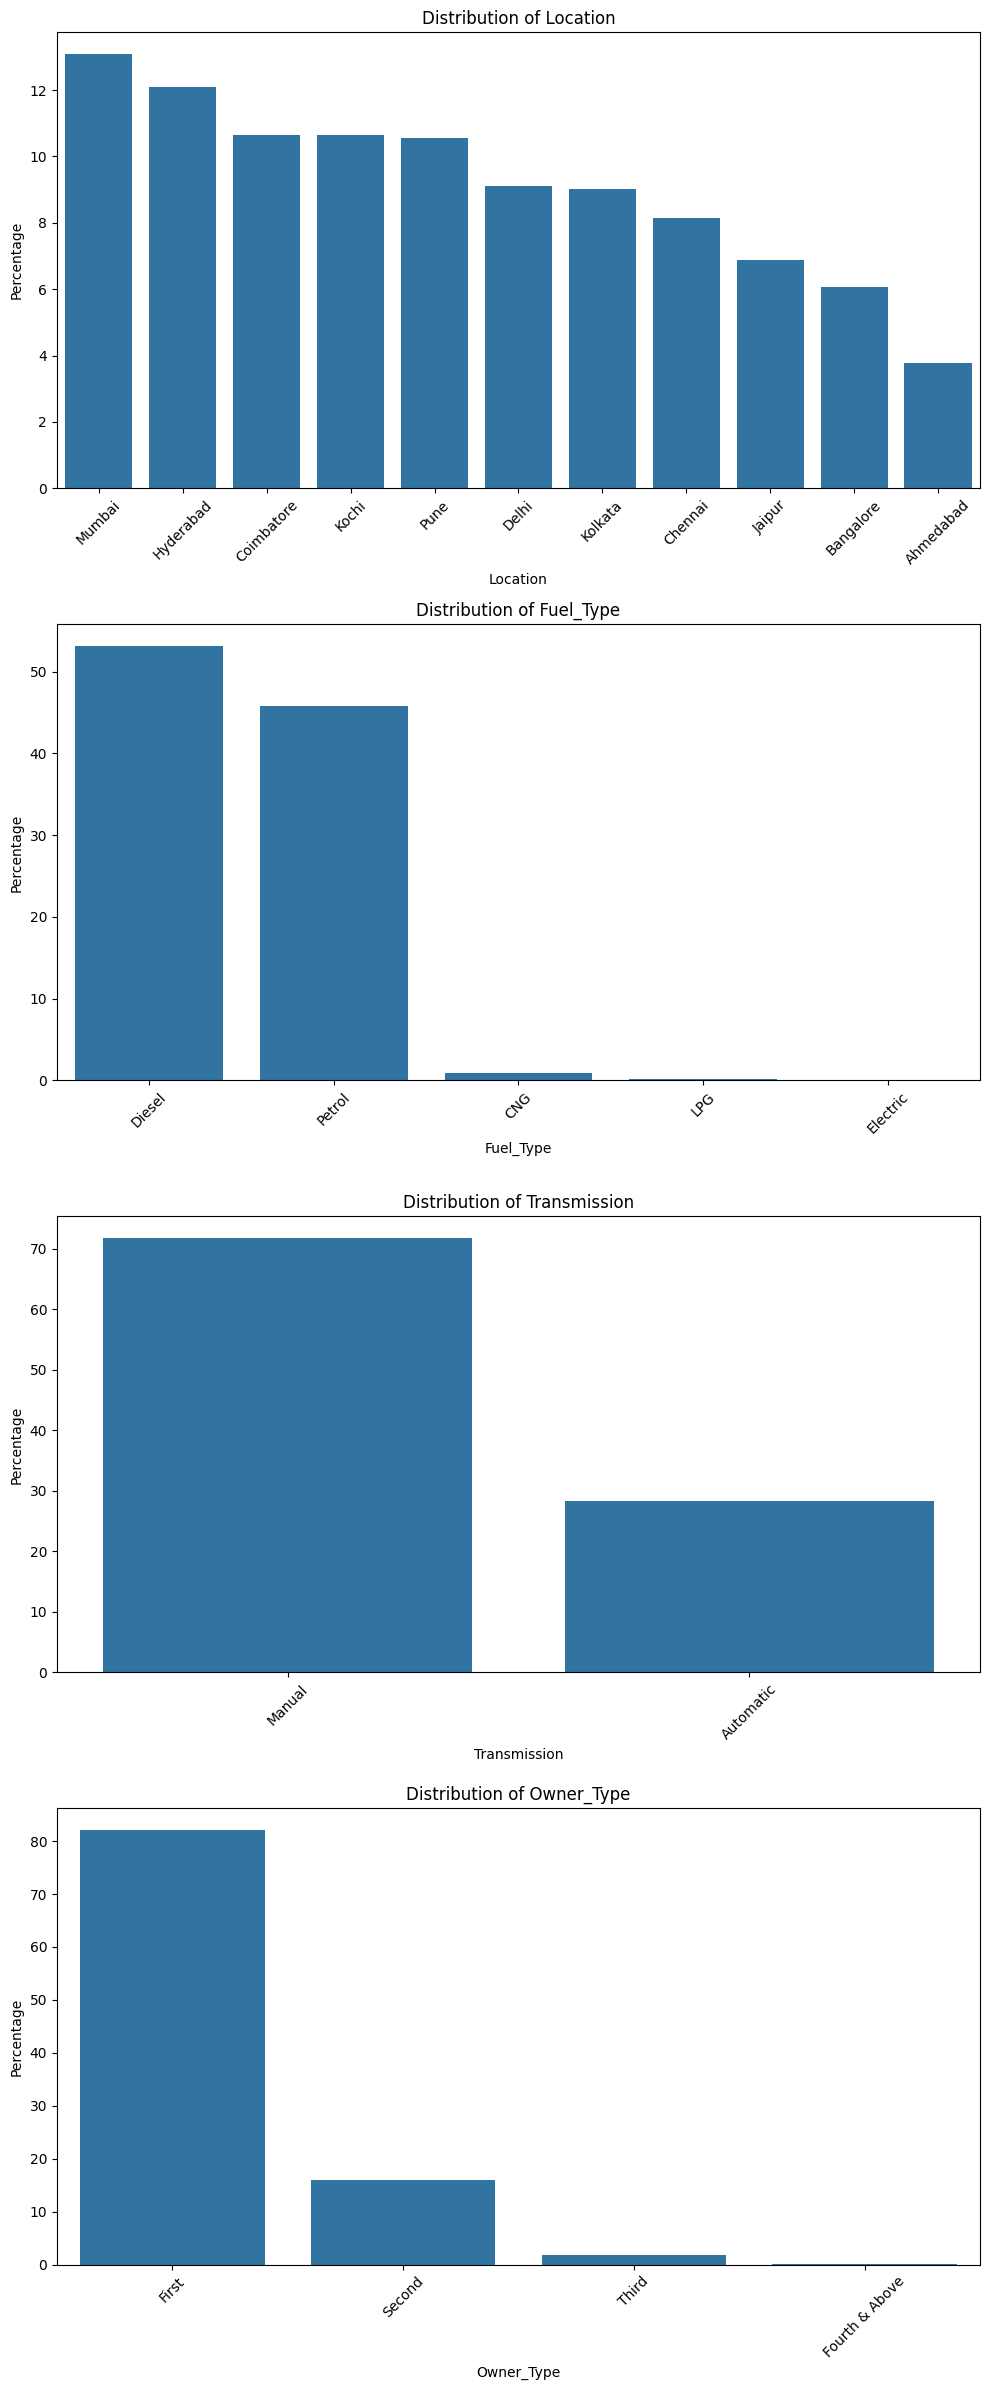

In [193]:
# Univariate analysis of categorical variables

cat_col = list(used_cars_df.select_dtypes(include = "object").columns)
cat_col.remove("Name")

fig, axes = plt.subplots(len(cat_col), 1, figsize=(10, 6*len(cat_col))) # create a figure and axes


for i, column in enumerate(cat_col):
    # Calculate the percentage of each category
    value_counts = used_cars_df[column].value_counts(normalize=True) * 100

    # Plotting the bar chart
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Percentage')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Observations


*   Our **top 4 locations** a car is sold or availble for purchase represents **45%** of the market activity in the used car market based off the data given



## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

<Axes: xlabel='New_price_log', ylabel='price_log'>

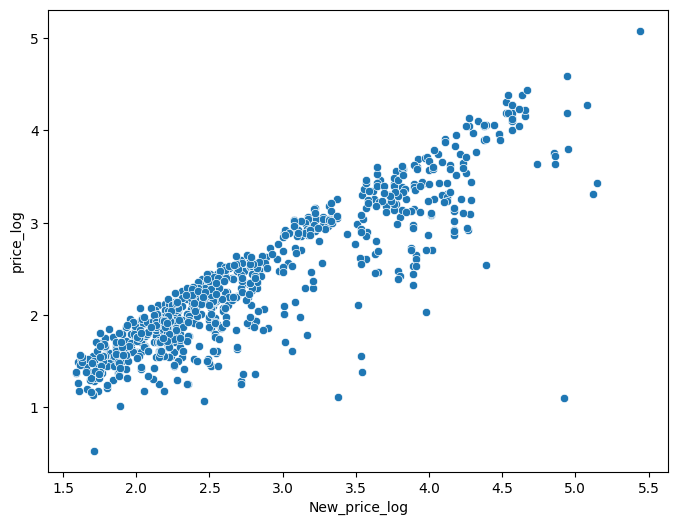

In [194]:
plt.figure(figsize = [8,6])
sns.scatterplot(x = log_price['New_price_log'], y = log_price['price_log'])

**Observations**

We can infer that there may be a significant correlation between 'New_price' and price which may be worth acknowledging

<Axes: xlabel='Kilometers_Driven_log', ylabel='price_log'>

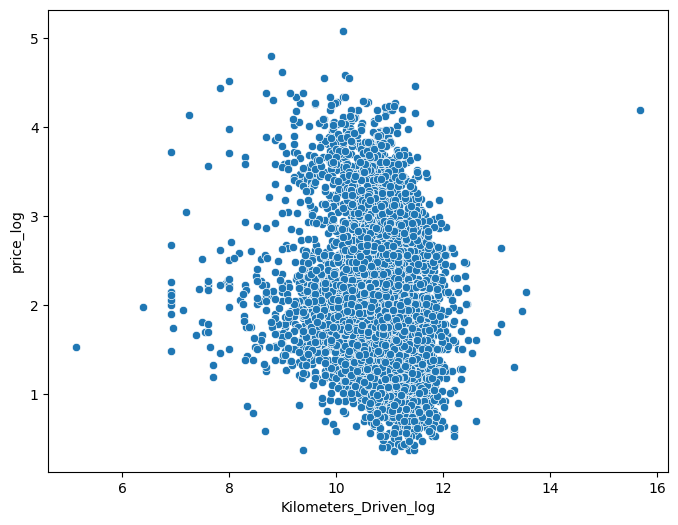

In [195]:
plt.figure(figsize = [8,6])
sns.scatterplot(x = log_price['Kilometers_Driven_log'], y = log_price['price_log'])

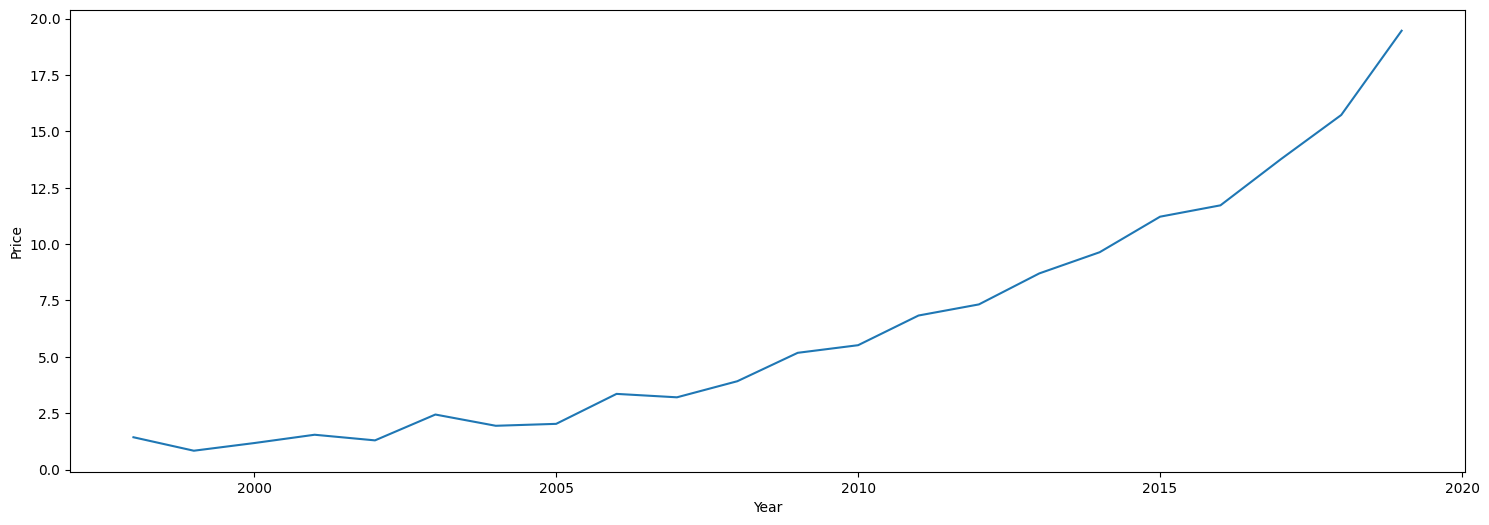

In [196]:
fig = plt.figure(figsize = (18, 6))

sns.lineplot(x = 'Year', y = 'Price', data = used_cars_df, ci = None, estimator = 'mean');

Observations


*   Based off our results from the line plot, I believe that there may be significant inights in this graph, considering such an increasing trend as the year of the car goes up, the Price does as well. We can infer that their might be a stong relationship between the two variables.

<Axes: xlabel='Location', ylabel='Price'>

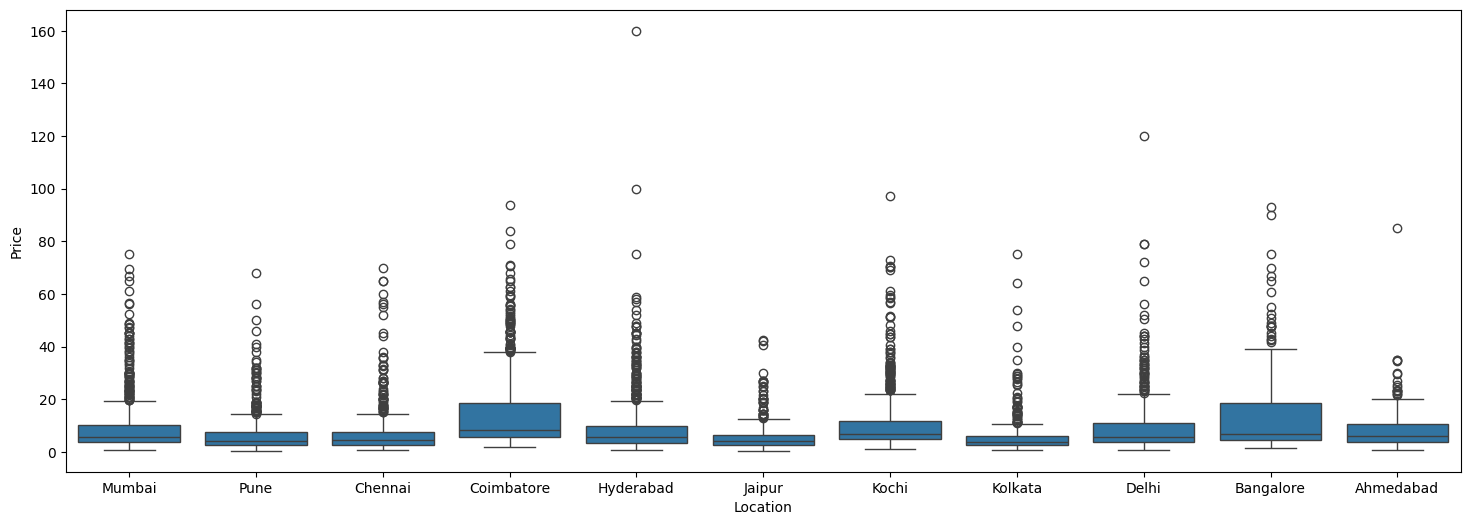

In [197]:
fig = plt.figure(figsize = (18, 6))

sns.boxplot(x = 'Location', y = 'Price', data = used_cars_df)

**Pricing Variation by City:** (*Top 3 Locations*)

The above graph shows us that the highest variations in price reside within the **Coimbatore**, **Bangalore**, **Kochi locations**

**Observations**


*   Based off our results from the line plot, I believe that there may be significant inights in this graph, considering such an increasing trend as the year of the car goes up, the Price does as well. We can infer that their might be a stong relationship between the two variables.




<Axes: >

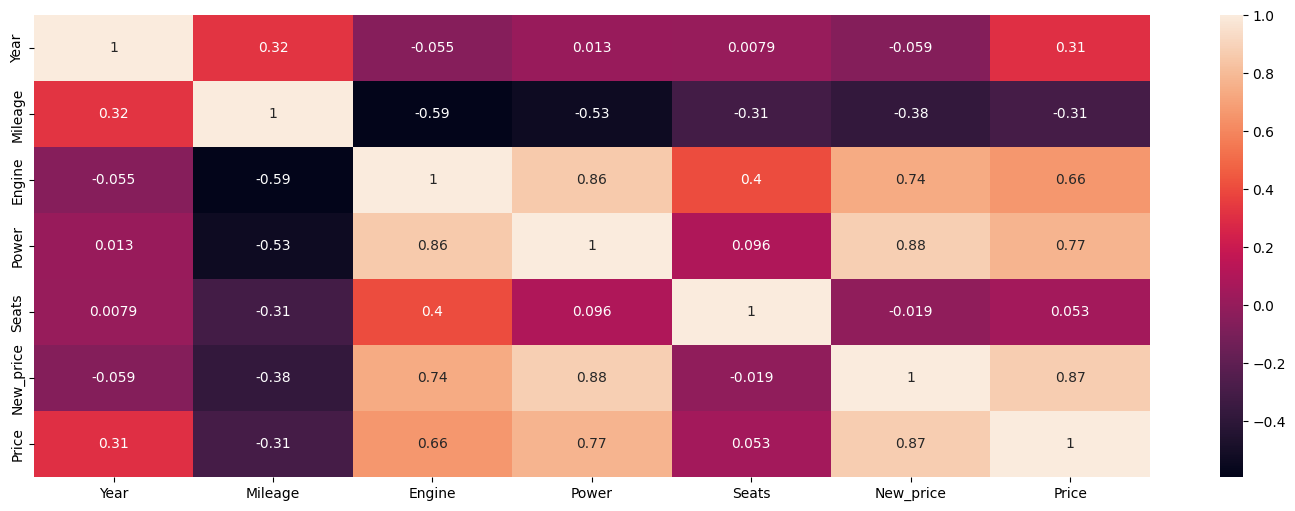

In [198]:
fig = plt.figure(figsize=(18,6))

# Select the columns for the heatmap and pass the DataFrame subset to the heatmap function
sns.heatmap(used_cars_df[['Year', 'Mileage', 'Engine', 'Power', 'Seats', 'New_price', 'Price']].corr(), annot=True)


**Observations**

Correlations Among Numerical Features:


*  The variable **'Engine'** has a slightly above **moderate positive correlation** with the target variable **'Price'** with a correlation score of (**.66%**), and correlations score of (**.74%**) and (**.86%**) with our other independent variables **'New_price'**, and **'Power'**, respectively.

  *   With a such a **high positive correlation in between independent variables** we can infer that we will need to **eliminate multicollinearity** in our pricing model once we go through the iteration process to improve the accuracy of our model


*   The target variable **'Price'** has a strong, positive correlation** with the variable, **'New_price'**, having a correlation score of (**.87%**), and correlations score of (**.77%**) and (**.66%**) with our other independent variables **'Power'**, and **'Engine'**, respectively.



*   Based off the results given on our heat map, we can reject our null hypothesis that their is a considerable significant relationship with the year and price of a car that affects the accuracy of the model we will create. Although, our line plot showed a consistent, upward trend that positevly correlates the year of a car with the price of the car, it still only had a correlation score of **(.31%)**







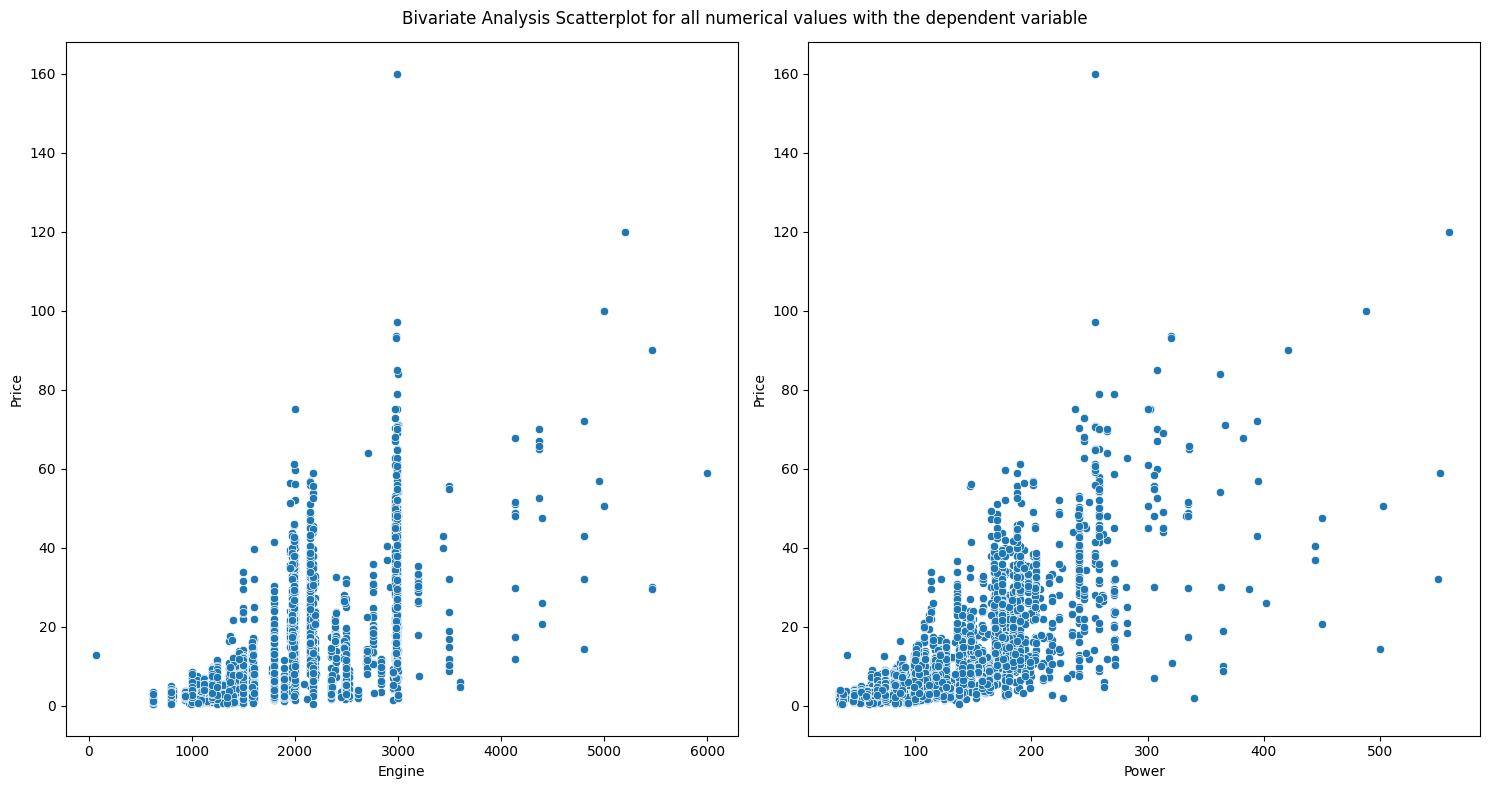

In [199]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

fig.suptitle('Bivariate Analysis Scatterplot for all numerical values with the dependent variable')

sns.scatterplot(x=used_cars_df['Engine'], y = used_cars_df["Price"], ax=axes[0])
sns.scatterplot(x=used_cars_df['Power'], y = used_cars_df["Price"], ax=axes[1])


plt.tight_layout()
plt.show()

### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [200]:
used_cars_df['Brand'] = used_cars_df['Name'].apply(lambda x: x.split()[0])  # Extract first word as Brand
used_cars_df['Model'] = used_cars_df['Name'].apply(lambda x: ' '.join(x.split()[1]))  # Extract remaining words as Model

In [201]:
used_cars_df['Brand'].describe()

,Brand
count,7253
unique,33
top,Maruti
freq,1444


In [202]:
used_cars_df['Model'].describe()

,Model
count,7253
unique,219
top,S w i f t
freq,418


**Observations**



*   After conducting **feature engineering** by dropping the variable, **'Name'**, and seperating the data in that column using 2 dummy variables**('Brand' & 'Model')** we computed the following results:

*   'Model': computed 219 unique values for the model of a car

*   'Brand': computed 33 unique values for the brand of a car

**Key Takeaway:**

Having a vast amount of unique values in our model can introduce higher dimensionality and add complexity to our model, reducing our models ability to generalize relationships between variables, which can negativle impact the accuracy and results of our models. Hence, is why we dropped the variable, 'Name'.





### **Missing value treatment**

In [203]:
# List of independent variables to impute
columns_to_impute = ['Mileage', 'Engine', 'Power', 'Seats', 'New_price']

# Impute missing values using the mean for each column
for col in columns_to_impute:
    used_cars_df[col] = used_cars_df[col].fillna(used_cars_df[col].mean())
    print(f"{col} has {used_cars_df[col].isnull().sum()} missing values")

Mileage has 0 missing values
Engine has 0 missing values
Power has 0 missing values
Seats has 0 missing values
New_price has 0 missing values


In [204]:
used_cars_df = used_cars_df.dropna(subset=['Price'])
used_cars_df.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


Observations



*   To perform a missing values treatment we imputed the variables *('Mileage', 'Engine', 'Power', 'Seats', 'New_price')* that have missing values by entering the mean value under each column that had missing data points
    * **Never** impute the target variable. You just need to remove the data points of missing values before you start the modeling process



## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?


*   We should drop 'Kilometers_Driven'



In [205]:
# Drop unnecessary categorical features
used_cars_df = used_cars_df.drop(columns=['Name', 'Kilometers_Driven'])

# Identify categorical columns (excluding 'Price' since it's the target)
categorical_cols = used_cars_df.select_dtypes(include=['object']).columns.tolist()

# Split into features (X) and target variable (y)
X = used_cars_df.drop(columns=['Price'])
y = used_cars_df['Price']

# Perform an 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Encode X_train and X_test ---
# Identify categorical columns in X_train and X_test
categorical_cols_train = X_train.select_dtypes(include=['object']).columns.tolist()
categorical_cols_test = X_test.select_dtypes(include=['object']).columns.tolist()

# One-Hot Encode categorical features for X_train and X_test
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols_test, drop_first=True)

# Display dataset shapes
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (4815, 13), Testing Set: (1204, 13)


In [206]:
train_df = pd.concat([X_train, y_train], axis=1) # function to create (X,y) matrix to define our train dataframe "train_df", from our testing data
train_df.head() # view first few rows of our train set

,S.No.,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Brand,Model,Price
4248,4248,Delhi,2011,Petrol,Manual,First,18.60,1199.0,79.40,5.0,22.779692,Chevrolet,B e a t,1.95
4129,4129,Coimbatore,2014,Diesel,Manual,First,22.77,1498.0,98.59,5.0,22.779692,Ford,E c o S p o r t,7.52
2534,2534,Kolkata,2018,Diesel,Manual,First,24.30,1248.0,88.50,5.0,10.130000,Maruti,V i t a r a,8.75
2893,2893,Delhi,2011,Diesel,Manual,First,12.99,2494.0,100.60,8.0,22.779692,Toyota,I n n o v a,6.95
2860,2860,Hyderabad,2017,Diesel,Manual,First,22.95,1248.0,74.00,5.0,7.970000,Tata,B o l t,6.00


In [207]:
test_df = pd.concat([X_test, y_test], axis=1) # function to create (X,y) matrix to define our test dataframe "test_df", from our training data
test_df.head() # view first few rows of our test set

,S.No.,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Brand,Model,Price
2868,2868,Hyderabad,2013,Diesel,Manual,First,23.4,1248.00000,74.000000,5.000000,22.779692,Maruti,S w i f t,5.75
5924,5924,Kochi,2017,Diesel,Manual,First,15.4,1997.00000,120.000000,7.000000,22.779692,Mahindra,S c o r p i o,10.08
3764,3764,Delhi,2014,Diesel,Manual,First,15.1,2179.00000,140.000000,7.000000,22.779692,Mahindra,X U V 5 0 0,7.85
4144,4144,Pune,2016,Diesel,Manual,Second,25.0,1396.00000,69.010000,5.000000,22.779692,Tata,I n d i g o,2.40
2780,2780,Pune,2009,Petrol,Manual,First,0.0,1616.57347,112.765214,5.280417,22.779692,Hyundai,S a n t r o,1.60


For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [208]:
# Calculating z-score to remove outliers from our data
# Compute Z-score for numerical features
from scipy.stats import zscore


# Select only numerical features
numerical_cols = train_df.select_dtypes(include=['number']).columns.tolist()

# Compute Z-score for numerical features
z_scores = train_df[numerical_cols].apply(zscore)

# Filter the dataset to keep only rows where all numerical features have Z-scores <= 3
train_df_cleaned = train_df[(z_scores.abs() <= 3).all(axis=1)]
target_variable = 'Price'
train_y = train_df_cleaned[target_variable]
train_X = train_df_cleaned.drop(columns=[target_variable])

# Encode train data
categorical_cols_train = train_X.select_dtypes(include=['object']).columns.tolist()
train_x_encoded = pd.get_dummies(train_X, columns=categorical_cols_train, drop_first=True)

# Display the shape of the cleaned dataset
print(f"Original dataset size: {train_df.shape}")
print(f"Cleaned dataset size: {train_df_cleaned.shape}")

Original dataset size: (4815, 14)
Cleaned dataset size: (4429, 14)


**Observations**



*   Treated outliers by computing a z-score on our numerical features that have Z-scores <= 3



In [209]:
# Creating an instance of the StandardScaler
scaler = StandardScaler()

# Applying fit_transform on the training features data
scaled_train_features = scaler.fit_transform(train_x_encoded) # Use train_X here


# Convert the scaled arrays to pandas DataFrames
scaled_train_features = pd.DataFrame(scaled_train_features, columns=train_x_encoded.columns, index=train_X.index)

# Adding the constant after scaling
scaled_train_features = sm.add_constant(scaled_train_features)

scaled_trained_df = pd.concat([scaled_train_features, train_y.reset_index(drop=True)], axis=1)

# First few rows of scaled train features
scaled_trained_df.head()

,const,S.No.,Year,Mileage,Engine,Power,Seats,New_price,Location_Bangalore,Location_Chennai,...,Model_X c e n t,Model_X e n o n,Model_X y l o,Model_Y e t i,Model_Z e n,Model_Z e s t,Model_i 1 0,Model_i 2 0,Model_r e d i - G O,Price
4248,1.0,0.706690,-0.833056,-0.005697,-0.685639,-0.651460,-0.341187,0.212879,-0.24973,-0.291104,...,-0.103565,-0.026035,-0.047571,-0.036831,-0.060213,-0.062074,-0.170419,-0.217468,-0.036831,4.75
4129,1.0,0.637563,0.160911,1.026923,-0.109638,-0.204386,-0.341187,0.212879,-0.24973,-0.291104,...,-0.103565,-0.026035,-0.047571,-0.036831,-0.060213,-0.062074,-0.170419,-0.217468,-0.036831,9.38
2534,1.0,-0.288981,1.486200,1.405797,-0.591244,-0.439455,-0.341187,-2.420452,-0.24973,-0.291104,...,-0.103565,-0.026035,-0.047571,-0.036831,-0.060213,-0.062074,-0.170419,-0.217468,-0.036831,3.58
2860,1.0,-0.099606,1.154878,1.071496,-0.591244,-0.777265,-0.341187,-2.870106,-0.24973,-0.291104,...,-0.103565,-0.026035,-0.047571,-0.036831,-0.060213,-0.062074,-0.170419,-0.217468,-0.036831,2.50
3085,1.0,0.031098,-0.170411,-1.105177,0.795782,1.559448,-0.341187,0.212879,-0.24973,3.435197,...,-0.103565,-0.026035,-0.047571,-0.036831,-0.060213,-0.062074,-0.170419,-0.217468,-0.036831,17.71


In [210]:
scaled_train_features = sm.add_constant(scaled_train_features)

ols_model = sm.OLS(train_y, scaled_train_features)

ols_res_0 = ols_model.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     156.9
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:49:11   Log-Likelihood:                -10437.
No. Observations:                4429   AIC:                         2.129e+04
Df Residuals:                    4223   BIC:                         2.260e+04
Df Model:                         205                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Observations:**

**Rsquared** for the **first iteration** of our model is **88%**

Not all variables are statistically represented as strong predictors to predict our target variable **'Price'**. Therefore, we will cross reference our p-value against every independent variable to check there significance

If **p-value** is **<=.05%** it is considered to be **statistically significant** with a confidence level of **95%**

**Interpretation of Regression Results:**

*   Adj. R Squared reflects the fit of the model
It ranges from 0 to 1, the higher the value the "best fit" the model is
*   List item

**Removing Multicollienarity:**

**Multicollinearity** is when we see a **significant high correlation** in **independent variables**. This phenomena can **negatively affect** our regression model results and can be problematic when we go to fit our model and interpret our results. Independent variables should be independent from one another, or else it can can cause the **coefficients** that the model suggest **unreliable**.

**How to Detect:**

Use the **Variance Inflation Factor** to **measure** the **inflation** in the **variances** of the **estimated regression coefficients** by existence of correlation among the predictor variables in the model


*   **VIF=1:** No correlation between the nth predictor and the remaining predictor variables, hence no inflation of the estimated regression coefficient

*   **VIF>5 or close to 5:** Moderate VIF
*   **VIF>=10:** Signs of high collinearity

In [211]:
vif_series=pd.Series(
    [variance_inflation_factor(scaled_train_features.values, i) for i in range(scaled_train_features.shape[1])],
    index=scaled_train_features.columns,
    dtype = float)
print("VIF Scores:")
print(vif_series)

VIF Scores:
const                   1.000000
S.No.                   1.045193
Year                    2.463827
Mileage                 8.399567
Engine                 22.300626
                         ...    
Model_Z e n                  inf
Model_Z e s t                inf
Model_i 1 0                  inf
Model_i 2 0                  inf
Model_r e d i - G O          inf
Length: 230, dtype: float64


In [212]:
scaled_train_features_new = scaled_train_features.drop(["Mileage", "Engine", "Power", "Seats"], axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(scaled_train_features_new.values, i) for i in range(scaled_train_features_new.shape[1])],
    index=scaled_train_features_new.columns,
    dtype = float)
print("VIF Scores:")
print(vif_series)

VIF Scores:
const                  1.000000e+00
S.No.                  1.044167e+00
Year                   2.080004e+00
New_price              1.561643e+00
Location_Bangalore     2.586511e+00
                           ...     
Model_Z e n            3.720836e+06
Model_Z e s t          1.600680e+07
Model_i 1 0            2.534451e+05
Model_i 2 0            7.254960e+05
Model_r e d i - G O    5.629613e+07
Length: 226, dtype: float64


In [213]:
ols_model_2 = sm.OLS(train_y, scaled_train_features_new)

ols_res_2 = ols_model_2.fit()

print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:51:19   Log-Likelihood:                -10532.
No. Observations:                4429   AIC:                         2.147e+04
Df Residuals:                    4227   BIC:                         2.276e+04
Df Model:                         201                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [214]:
# Identify the specific Model columns to keep
model_columns_to_keep = ['Model_X 3', 'Model_X 5', 'Model_X 6', 'Model_5', 'Model_7']

# Get all column names
all_columns = scaled_train_features_new.columns.tolist()

# Identify columns to drop, keeping only the model_columns_to_keep and not other model columns
columns_to_drop = [col for col in all_columns if col.startswith('Model') and col not in model_columns_to_keep]

# Drop the identified columns
scaled_train_features_new2 = scaled_train_features_new.drop(columns=columns_to_drop)


# Calculate VIF for the filtered features
vif_series = pd.Series(
    [variance_inflation_factor(scaled_train_features_new2.values, i)
     for i in range(scaled_train_features_new2.shape[1])],
    index=scaled_train_features_new2.columns)


print("VIF Scores:")
print(vif_series)

VIF Scores:
const                         1.000000
S.No.                         1.009906
Year                          1.452051
New_price                     1.173655
Location_Bangalore            2.505371
Location_Chennai              2.969370
Location_Coimbatore           3.539559
Location_Delhi                3.292724
Location_Hyderabad            3.929929
Location_Jaipur               2.727912
Location_Kochi                3.676700
Location_Kolkata              3.249204
Location_Mumbai               3.990457
Location_Pune                 3.561668
Fuel_Type_Diesel             34.221245
Fuel_Type_Electric            1.042631
Fuel_Type_LPG                 1.275753
Fuel_Type_Petrol             33.872635
Transmission_Manual           1.857175
Owner_Type_Fourth & Above     1.010518
Owner_Type_Second             1.170544
Owner_Type_Third              1.096928
Brand_BMW                     2.565257
Brand_Chevrolet               1.762744
Brand_Datsun                  1.127785
Brand_Fiat   

In [215]:
ols_model_3 = sm.OLS(train_y, scaled_train_features_new2)

ols_res_3 = ols_model_3.fit()

print(ols_res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     307.2
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:51:32   Log-Likelihood:                -11836.
No. Observations:                4429   AIC:                         2.378e+04
Df Residuals:                    4377   BIC:                         2.411e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [216]:
scaled_train_features_new3 = scaled_train_features_new2.drop(['Fuel_Type_Electric','Fuel_Type_LPG', 'Fuel_Type_Petrol', 'S.No.',
  'Brand_Mercedes-Benz', 'Brand_Isuzu', 'Owner_Type_Fourth & Above',
  'Owner_Type_Third', 'Location_Chennai', 'Location_Delhi', 'Location_Jaipur',
  'Location_Mumbai', 'Location_Pune'], axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(scaled_train_features_new3.values, i) for i in range(scaled_train_features_new3.shape[1])],
    index = scaled_train_features_new3.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const                  1.000000
Year                   1.365397
New_price              1.169567
Location_Bangalore     1.075211
Location_Coimbatore    1.159437
Location_Hyderabad     1.124644
Location_Kochi         1.170309
Location_Kolkata       1.106148
Fuel_Type_Diesel       1.347833
Transmission_Manual    1.839653
Owner_Type_Second      1.138698
Brand_BMW              2.022018
Brand_Chevrolet        1.405286
Brand_Datsun           1.081520
Brand_Fiat             1.092688
Brand_Force            1.016700
Brand_Ford             1.962349
Brand_Honda            2.951883
Brand_Hyundai          4.187835
Brand_ISUZU            1.011215
Brand_Jaguar           1.064834
Brand_Jeep             1.058631
Brand_Land             1.059788
Brand_Mahindra         1.707712
Brand_Maruti           4.516519
Brand_Mini             1.075758
Brand_Mitsubishi       1.070542
Brand_Nissan           1.316708
Brand_Renault          1.480902
Brand_Skoda            1.417929
Brand_Tata             1.6

In [217]:
ols_model_4 = sm.OLS(train_y, scaled_train_features_new3)

ols_res_4 = ols_model_4.fit()

print(ols_res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     412.3
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:51:43   Log-Likelihood:                -11842.
No. Observations:                4429   AIC:                         2.376e+04
Df Residuals:                    4390   BIC:                         2.401e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.0775    

Observations:

*   All the VIF Scores are now less than 5 indicating no multicollinearity.
*   Now, all the p values are less than 0.05 implying all the current variables are significant for the model. Although, our R-Squared decreased we still achieved a score of.78% after going through our iteration process of tuning the model and removing multicollinearity to improve our accuracy and closing the gap between our Rsquared and Adj. Rsquared by .04%.


*   Final iteration:
*   Rsquared: **.781%**; Adj. Rsquared: **.779%**







In [218]:
residuals = ols_res_4.resid

In [219]:
residuals.mean()

6.567988169342629e-15

<Axes: ylabel='Count'>

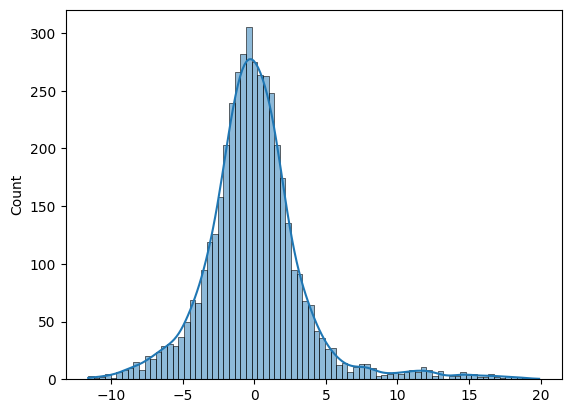

In [220]:
sns.histplot(residuals, kde=True)

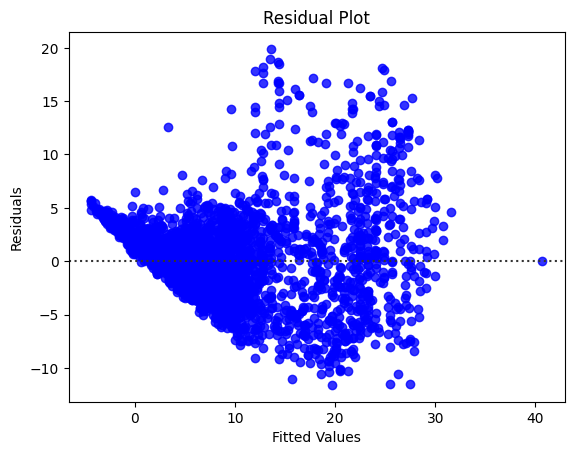

In [221]:
# Predicted Values
fitted = ols_res_4.fittedvalues
sns.residplot(x = fitted, y = residuals, color = "blue")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Observations:

*   We can see that there is some pattern in fitted values and residuals, i.e., the residuals are **not randomly distributed**.
*   We applied the log transformation on the target variable to try and build a new model.



In [222]:
# Log transformation on the target variable
train_y_log = np.log(train_y)

In [223]:
# Fitting new model with the transformed target variable
ols_model_4 = sm.OLS(train_y_log, scaled_train_features_new3)

ols_res_4 = ols_model_4.fit()

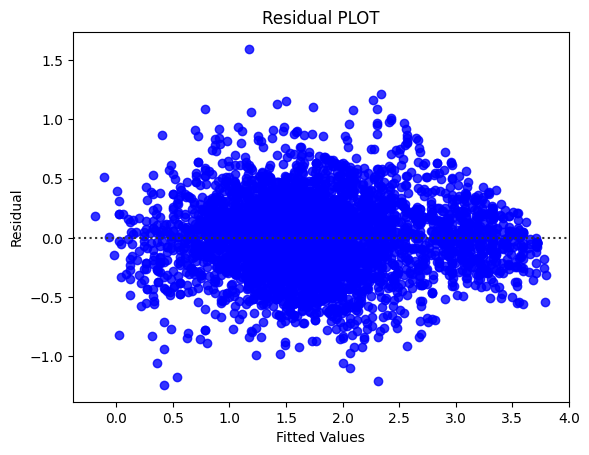

In [224]:
# Predicted values
fitted = ols_res_4.fittedvalues

residual1 = ols_res_4.resid

sns.residplot(x = fitted, y = residual1, color = "blue")

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

Observations:


*   We can see that there is no pattern in the residuals vs fitted values scatter plot now, i.e., the linearity assumption is satisfied.
*   Will now check the model summary of the latest model we have fit.

In [225]:
print(ols_res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     594.7
Date:                Mon, 03 Mar 2025   Prob (F-statistic):               0.00
Time:                        23:52:16   Log-Likelihood:                -1158.2
No. Observations:                4429   AIC:                             2394.
Df Residuals:                    4390   BIC:                             2644.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.7682    



*   The model performance has improved from an Rsqaured of 78% to 83%

We will use **Goldfeld–Quandt** test to check **homoscedasticity**.

**Null Hypothesis**: Residuals are homoscedastic (*variance is of the residuals are symmetrically distibuted across the regression line*)

**Alternate hypothesis**: Residuals are hetroscedastic (*variance is unequal for the residuals across the regression line, nonsymmetrical*)

In [226]:
# Perform White's test for heteroskedasticity
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(train_y_log, scaled_train_features_new3)

lzip(name, test)

[('F statistic', 1.1227263409936512), ('p-value', 0.0034716634848429694)]

Observations

*   As we observe from the above test, the **p-value** is **less than 0.05**, so we want to **reject** the null-hypothesis. That means the residuals are **heteroscedatic**.

We have verified all assumptions of the linear regression model. The final equation of the model is as follows:

log(Price) = 1.7682 + 0.3637 * Year + 0.0188 * New_price + 0.0487 * Location_Bangalore + 0.0429 * Location_Coimbatore + 0.0344 * Location_Hyderabad + 0.0036 * Location_Kochi + -0.0602 * Location_Kolkata + 0.1525 * Fuel_Type_Diesel + -0.1527 * Transmission_Manual + -0.0223 * Owner_Type_Second + -0.0276 * Brand_BMW + -0.1898 * Brand_Chevrolet + -0.0804 * Brand_Datsun + -0.0824 * Brand_Fiat + -0.0102 * Brand_Force + -0.2342 * Brand_Ford + -0.2718 * Brand_Honda + -0.4034 * Brand_Hyundai + -0.0172 * Brand_ISUZU + 0.0171 * Brand_Jaguar + -0.0133 * Brand_Jeep + 0.0128 * Brand_Land + -0.1493 * Brand_Mahindra + -0.4703 * Brand_Maruti + 0.0096 * Brand_Mini + -0.0162 * Brand_Mitsubishi + -0.1369 * Brand_Nissan + -0.1767 * Brand_Renault + -0.1349 * Brand_Skoda + -0.2841 * Brand_Tata + -0.1053 * Brand_Toyota +  -0.2343 * Brand_Volkswagen + -0.0090 * Brand_Volvo + 0.0221 * Model_5 + 0.0170 * Model_7 + 0.0082 * Model_X 3 + 0.0305 * Model_X 5 + 0.0094 * Model_X 6

**Final Model**

In [227]:
# Applying scaling before dropping columns
test_features = pd.DataFrame(test_df.drop(columns=['Price'])) #drop price column

# One-Hot Encode categorical features for test_features
categorical_cols_test = test_features.select_dtypes(include=['object']).columns.tolist()
test_features_encoded = pd.get_dummies(test_features, columns=categorical_cols_test, drop_first=True)

# Aligning columns of test_features_encoded with train_x_encoded, adding missing columns and filling with 0
train_x_encoded_cols = scaled_train_features.drop(columns = ['const']).columns.tolist() #Get columns from already scaled training set before dropping
test_features_encoded = test_features_encoded.reindex(columns=train_x_encoded_cols, fill_value=0)


# Scale the test features using the scaler fitted on training data, before selecting final model columns
test_features_scaled = pd.DataFrame(scaler.transform(test_features_encoded), columns=train_x_encoded_cols, index=test_features_encoded.index)


# Extract the final model's column names from the model object.
final_model_columns = ols_res_4.model.exog_names

# Ensure test data includes only the columns used in final model and reindex.
test_features_scaled = test_features_scaled[final_model_columns[1:]] #slicing to avoid selecting 'const' at this time



#Add the constant column to the test data AFTER scaling
test_features_scaled = sm.add_constant(test_features_scaled, has_constant='add')

test_features_scaled.head()

,const,Year,New_price,Location_Bangalore,Location_Coimbatore,Location_Hyderabad,Location_Kochi,Location_Kolkata,Fuel_Type_Diesel,Transmission_Manual,...,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Model_5,Model_7,Model_X 3,Model_X 5,Model_X 6
2868,1.0,-0.170411,0.212879,-0.24973,-0.339612,2.647459,-0.351484,-0.318109,0.968218,0.593257,...,-0.175952,-0.183975,-0.258789,-0.246139,-0.062074,-0.090525,-0.021255,-0.039787,-0.054257,-0.015028
5924,1.0,1.154878,0.212879,-0.24973,-0.339612,-0.377721,2.845076,-0.318109,0.968218,0.593257,...,-0.175952,-0.183975,-0.258789,-0.246139,-0.062074,-0.090525,-0.021255,-0.039787,-0.054257,-0.015028
3764,1.0,0.160911,0.212879,-0.24973,-0.339612,-0.377721,-0.351484,-0.318109,0.968218,0.593257,...,-0.175952,-0.183975,-0.258789,-0.246139,-0.062074,-0.090525,-0.021255,-0.039787,-0.054257,-0.015028
4144,1.0,0.823556,0.212879,-0.24973,-0.339612,-0.377721,-0.351484,-0.318109,0.968218,0.593257,...,-0.175952,5.435515,-0.258789,-0.246139,-0.062074,-0.090525,-0.021255,-0.039787,-0.054257,-0.015028
2780,1.0,-1.495701,0.212879,-0.24973,-0.339612,-0.377721,-0.351484,-0.318109,-1.032826,0.593257,...,-0.175952,-0.183975,-0.258789,-0.246139,-0.062074,-0.090525,-0.021255,-0.039787,-0.054257,-0.015028


R-squared

This metrics gives us an indication on how well our model is from the baseline model

In [228]:
print(ols_res_4.rsquared)

0.8373300028759817


Mean Squared Error("MSE")

This metric measures the avg. of the squares of errors between the estimated and actual values

In [229]:
print(ols_res_4.mse_resid)

0.09965882975463003


Root Mean Squared Error

We are taking the avg and the sqrt of MSE to RMSE

In [230]:
print(np.sqrt(ols_res_4.mse_resid))

0.3156878676075944


Mean Absolute Error ("MAE")

Calculates the average size of errors in price predictions.



In [231]:
# Get the predictions from the model
predictions = ols_res_4.predict(scaled_train_features_new3)

# Calculate the MAE
mae = mean_absolute_error(train_y_log, predictions)

# Print the MAE
print(mae)

0.24452363436728075


Cross Validation Score

Identifying if the model we have built is **underfitted**, **overfitted**, or **just right fit** model

In [232]:
# Fitting linear model

linearregression = LinearRegression()

cv_Score1 = cross_val_score(linearregression, scaled_train_features_new3, train_y_log, cv = 10)

cv_Score2 = cross_val_score(linearregression, scaled_train_features_new3, train_y_log, cv = 10, scoring = "neg_mean_squared_error")

print("Rsquared: %0.3f (+/- %0.3f)" % (cv_Score1.mean(), cv_Score1.std()*2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score2.mean(), cv_Score2.std()*2))

Rsquared: 0.833 (+/- 0.038)
Mean Squared Error: 0.101 (+/- 0.020)


Observations


*   The R-Squared on cross validation is almost identical to the R-Squared on the training dataset off by **.004**
*   The MSE on cross validation is **.10** which almost identical to the MSE on the training dataset(**.09**)

In [233]:
# These test predictions will be on a log scale
test_predictions = ols_res_4.predict(test_features_scaled)

# We are converting the log scale predictions to its original scale
test_predictions_inverse_transformed = np.exp(test_predictions)

test_predictions_inverse_transformed

,0
2868,4.841000
5924,10.470830
3764,7.210078
4144,3.769327
2780,2.257892
...,...
5926,0.671289
4216,4.711165
1351,4.139356
4603,6.702862


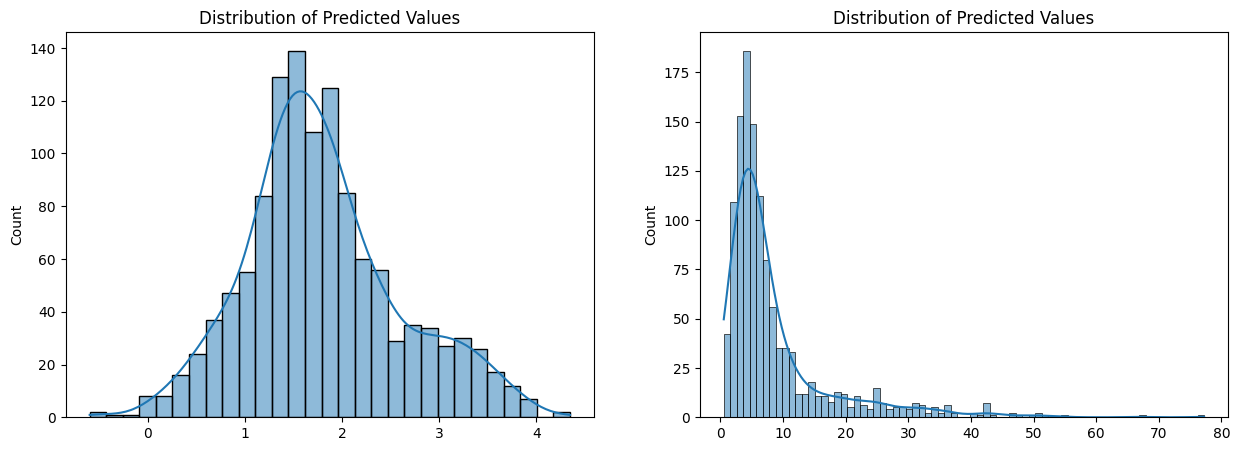

In [235]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

sns.histplot(test_predictions, ax = ax[0], kde=True)

sns.histplot(test_predictions_inverse_transformed, ax = ax[1], kde=True)

set_title = ("Distribution of Predicted Values")
ax[0].set_title(set_title)
ax[1].set_title(set_title)

plt.show()

Took exponentiation to tranform the data back to its original scale by doing the inverse of log transformation

### **Hyperparameter Tuning: Decision Tree**

In [236]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [237]:
# Initialize Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)

In [238]:
# Hyperparameter Tuning for Decision Tree
dt_params = {
    'max_depth': [5, 10, 15, None], # Try different max depths of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 5], # Minimum number of samples required at a leaf node
    'max_features': ['sqrt','log2', None] # Try different options for number of features
}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
dt_grid.fit(X_train_encoded, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [240]:
# Best Decision Tree Model Prediction
best_dt = dt_grid.best_estimator_

# Get missing columns in the training test
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test_encoded[c] = 0

# Ensure the order of column in the test set is in the same order than in train set
X_test_encoded = X_test_encoded[X_train_encoded.columns]

dt_best_pred = best_dt.predict(X_test_encoded) # Make predictions using the transformed test set
best_params = dt_grid.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [241]:
# Evaluate Best Decision Tree Model
best_dt_r2 = r2_score(y_test, dt_best_pred)
best_dt_rmse = np.sqrt(mean_squared_error(y_test, dt_best_pred))
best_dt_mae = mean_absolute_error(y_test, dt_best_pred)

print(f"Best Decision Tree - R²: {best_dt_r2:.4f}, RMSE: {best_dt_rmse:.4f}, MAE: {best_dt_mae:.4f}")

Best Decision Tree - R²: 0.8171, RMSE: 4.7444, MAE: 1.9613


**Decision Tree Results**

**Rsquared:** .81% ; **RMSE:** 4.7% ; **MAE:** 1.96%

**Feature Importance**

In [242]:
# Assuming 'best_dt' is our trained DecisionTreeRegressor model
feature_importance = pd.DataFrame({'feature': X_train_encoded.columns, 'importance': best_dt.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("Feature Importance (Gini)")
print(feature_importance)

Feature Importance (Gini)
                 feature  importance
4                  Power    0.670623
1                   Year    0.184045
3                 Engine    0.055902
6              New_price    0.013523
2                Mileage    0.012071
..                   ...         ...
123    Model_E v a l i a    0.000000
124              Model_F    0.000000
125      Model_F a b i a    0.000000
126    Model_F i e s t a    0.000000
257  Model_r e d i - G O    0.000000

[258 rows x 2 columns]


In [243]:
from sklearn.inspection import permutation_importance
# Assuming 'best_dt' is your trained DecisionTreeRegressor model and you have X_test_encoded and y_test defined
result = permutation_importance(best_dt, X_test_encoded, y_test, n_repeats=10, random_state=42, n_jobs=-1)

permutation_importance = pd.DataFrame({'feature': X_test_encoded.columns, 'importance': result.importances_mean})

permutation_importance = permutation_importance.sort_values('importance', ascending=False)

print("\nFeature Importance (Permutation)")
print(permutation_importance)


Feature Importance (Permutation)
                   feature  importance
4                    Power    0.795441
1                     Year    0.431928
3                   Engine    0.126601
5                    Seats    0.032886
21     Transmission_Manual    0.025300
..                     ...         ...
140        Model_G r a n d   -0.000008
113  Model_E c o s p o r t   -0.000008
8         Location_Chennai   -0.000034
134            Model_G L C   -0.000065
25               Brand_BMW   -0.000134

[258 rows x 2 columns]


**Observations**

**n_repeats**: The number of times to shuffle and calculate the performance for each feature.

**random_state**: To make the results reproducible.

**n_jobs:** how effecient the model uses CPU

**Key Takeaways:**

**Power:** Permutation Importance **(.79)** is higher than Gini Importance **(.67)**, which means the 'Power' variable has strong predictive value because of how it interacts with other features that can influence the accuracy of our model

### **Hyperparameter Tuning: Random Forest**

In [245]:
#creating parameter grid for the Random Forests model
rf_params = {
        'n_estimators': [5, 10, 15],  # Number of trees in the forest
        'max_depth': [10, 15, 20, None], # Try different max depths of the tree
        'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
        'min_samples_leaf': [1, 2, 5], # Minimum number of samples required at a leaf node
        'max_features': ['sqrt', 'log2', None] # Try different options for number of features
    }

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train_encoded, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 15]},
             scoring='neg_mean_squared_error')

In [246]:
best_rf = rf_grid.best_estimator_
best_params = rf_grid.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}


In [247]:
rf_best_pred = best_rf.predict(X_test_encoded)
best_rf_r2 = r2_score(y_test, rf_best_pred)
best_rf_rmse = np.sqrt(mean_squared_error(y_test, rf_best_pred))
best_rf_mae = mean_absolute_error(y_test, rf_best_pred)
print(f"Best Random Forest - R²: {best_rf_r2:.4f}, RMSE: {best_rf_rmse:.4f}, MAE: {best_rf_mae:.4f}")

Best Random Forest - R²: 0.8765, RMSE: 3.8987, MAE: 1.5696


**Random Forests Results**

**Rsquared:** .876% ; **RMSE:** 3.89% ; **MAE:** 1.56%

**Feature Importance**

In [248]:
feature_importance = pd.DataFrame({'feature': X_train_encoded.columns, 'importance': best_rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("Feature Importance (Gini)")
print(feature_importance)

Feature Importance (Gini)
                     feature  importance
4                      Power    0.657280
1                       Year    0.160158
3                     Engine    0.037660
6                  New_price    0.023195
2                    Mileage    0.016057
..                       ...         ...
190            Model_R e d i    0.000000
121        Model_E s t i l o    0.000000
123        Model_E v a l i a    0.000000
191      Model_R e n a u l t    0.000000
72   Model_A v v e n t u r a    0.000000

[258 rows x 2 columns]


In [249]:
from sklearn.inspection import permutation_importance
result = permutation_importance(best_rf, X_test_encoded, y_test, n_repeats=10, random_state=42, n_jobs=-1)

permutation_importance = pd.DataFrame({'feature': X_test_encoded.columns, 'importance': best_rf.feature_importances_})

permutation_importance = permutation_importance.sort_values('importance', ascending=False)

print("\nFeature Importance (Permutation)")
print(permutation_importance)


Feature Importance (Permutation)
                     feature  importance
4                      Power    0.657280
1                       Year    0.160158
3                     Engine    0.037660
6                  New_price    0.023195
2                    Mileage    0.016057
..                       ...         ...
190            Model_R e d i    0.000000
121        Model_E s t i l o    0.000000
123        Model_E v a l i a    0.000000
191      Model_R e n a u l t    0.000000
72   Model_A v v e n t u r a    0.000000

[258 rows x 2 columns]


Scores Analysis of Feature Importance (Permutation)


*  **Power:** My **most** important feature with a very high permuatation importance of **(.657)** using the Random Forests model. This means the model relies heavily on this feature for accurate predictions. **Shuffling** the **'Power'** feature will have a large **negative impact** on the model performance.

*   **Year:** **Second** most important feature, with a moderate impact on the model of **(.160)**. It also indicates that the model uses this feature, but less than 'Power'.


*   **Engine:** Very small importance score **(.037)**, indicating that it is not as influential on model predictions compared to **'power'** and **'year'**.


## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?



*   We compared Linear Regression, Decision Tree, and Random Forests using the following metrics:
    *   Rsquared

    *   RMSE
    *   MAE

Models Analysis:(descending order based off performances)*


*   **Random Tree Forests:**(Best Pricing Model)

    *   Best performance based on all three metrics.
    *   Rsquared:Highest score**(87%)**; RMSE: lowest score **(3.89%)**; MAE: lowest score **(1.5%)**
    *   Balances bias and variance/captures complex relationships most efficiently

*   **Linear Regression Model**
    *   Second best performance; Rsquared: **(83.7%)**

    *   RMSE: Highest score **(10%)**
    *   May struggle with complex relationships between variables


*  **Decision Tree**
    *   Lowest model performance; Rsquared: **(81%)**

    *   Did not generalize the data well, which could lead to overfitting



**Scopes of Potential Improvement**


*   Adjusting the hyerparameters of our model to figure out the most optimal results for our pricing model














**2. Refined insights:**

What are the most meaningful insights relevant to the problem?

*   **'Year':** Newer cars retain value better.
*   **Power**, **Year**, and **Engine** were our highest features of importance in our Decision Tree and Random Forests model
*   Decision Trees and Random Forests **show non-linear relationships** in our model that can lead to better predictions





**3. Proposal for the final solution design:**

What model do you propose to be adopted? Why is this the best solution to adopt?



*   I **recommend** the **Random Forest** model for our pricing model.
*   Why?

    *  **Best Accuracy**: **Highest** Rsquared score; **Lowest** 'RMSE', meaning better **genralization**
    *   Can handle **non-linearity well** compared to our linear regression model, and captures complex relationships between features effeciently
    *  **Reduces** and **prevents** **overfitting** by taking the average of multiple trees
    *   By conducting a **feature importance analysis** it allows us to interpret which variables influence pricing the most



